<a href="https://colab.research.google.com/github/thgemanuel/Exercicio-3-Topicos-em-Inteligencia-Computacional/blob/main/Regressao_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Disciplina: Tópicos em Inteligência Computacional**

Instituto Federal do Norte de Minas Gerais Campus Montes Claros

Curso: Ciência da Computação

Professora: Luciana Balieiro Cosme



---


# **Regressão**

Técnicas para modelos de regressão (linear, não-linear), em termos gerais, consistem em predizer o valor de uma variável dependente em função de outras variáveis preditores.

Por exemplo, imagine poder prever o preço de uma casa, com base em dados, como a taxa de criminalidade na região da casa, número de quartos, etc. 


Considere a base de dados sintética que será explorada a seguir:

In [ ]:
import numpy as np

X = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0])
y = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8])
X

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
y

array([ 5. ,  8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32. , 33.8])

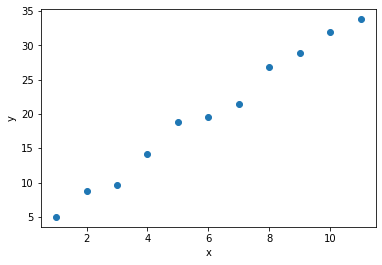

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

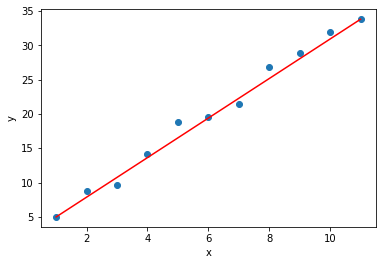

In [ ]:
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot([1,11],[5,33.8], 'r-')
plt.show()



---


# Regressão linear simples
Um modelo linear que representa a relação entre uma variável dependente ($y$) e uma variável independente ($x$):


$y = \beta_0 + \beta_1 x + \varepsilon$

temos que, $\beta_1$ indica a inclinação da reta  e $\beta_0$ intercepto, e uma variável aleatória (erro) $\varepsilon$, considerada normalmente distribuída com E($\varepsilon$) = 0 e V($\varepsilon$) = $\sigma^2$

<br>

---

<br>

*Os parâmetros do modelo são estimados pelo método de mínimos quadrados*


Para o nosso exemplo:

1) Transformar nossos dados em vetor coluna

In [ ]:
X.reshape(-1,1)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.]])

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# treina o modelo
regr.fit(X.reshape(-1,1), y.reshape(-1,1))

# coeficiente B1
print('Coeficiente B1: \n', regr.coef_)
#intercepto B0
print('Intercepto B0: \n', regr.intercept_)

Coeficiente B1: 
 [[2.93181818]]
Intercepto B0: 
 [2.3]


In [ ]:
 x_teste = X[4]
 y_teste = y[4]

 y_predito = regr.intercept_ + regr.coef_ * x_teste

 print("y real: ", y_teste, "\ny predito: ", y_predito[0,0])

y real:  18.8 
y predito:  16.95909090909091


In [ ]:
print(regr.predict(x_teste.reshape(1, -1)))

[[16.95909091]]


Amostras novas:

In [ ]:
x_novo = np.array(12)
y_novo = 38.2

print(regr.predict(x_novo.reshape(1, -1)))

[[37.48181818]]


# **Base de dados real**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()


print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
import pandas

tabela = pandas.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
#mostra uma quantidade maior de linhas, no caso, 10 linhas.
tabela.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [ ]:
# e a progressao da doenca
tabela['y'] = diabetes.target
tabela.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [ ]:
## Exemplo

#Para criar o modelo irei usar todos os dados, exceto os últimos 20 registros, da coluna age (idade)
X = tabela['age']
X_treinamento = X[:-20].array.to_numpy().reshape(-1,1)
#Para validar o modelo, usei os 20 últimos registros
X_teste = X[-20:].array.to_numpy().reshape(-1,1)

y = tabela['y']
#mesma coisa aqui, porém, para o target (coluna y)
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)

#cria o modelo de regressão linear
regr = linear_model.LinearRegression()

# treina o modelo com os dados treinamento
regr.fit(X_treinamento, y_treinamento)

#coeficientes b1
print('Coeficiente b1: \n', regr.coef_)
#intercepto b0
print('Coeficiente b0: \n', regr.intercept_)

Coeficiente b1: 
 [306.72757499]
Coeficiente b0: 
 153.24279071761313


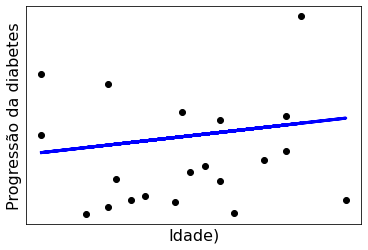

In [ ]:
# Predição/validação
diabetes_y_pred = regr.predict(X_teste)
#plota os dados reais
plt.scatter(X_teste,y_teste,  color='black')
# plota os dados preditos
plt.plot(X_teste, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("Idade", size = 16,)
plt.ylabel("Progressão da diabetes", size = 16)
plt.show()

Como podemos comparar dois modelos? Uma abordagem simples, e também ingênua, é observar a diferença entre o valor real e o valor predito.






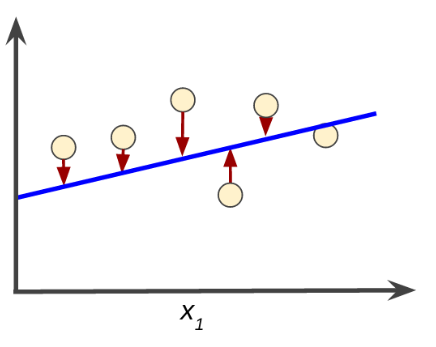

Fonte: https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss

In [ ]:
print('Erro médio: ', sum(abs(y_teste-diabetes_y_pred.reshape(-1,1))))

Erro médio:  [1311.1629406]


# Exercício

Considere, pelo menos, outras duas características da base de dados Diabetes, repita o exemplo:

1.   Para cada característica individualmente compare o resultado com a característica "age", visualmente (gráfico) e por meio duas medidas de erro: $abs(y_{teste} - y_{predito})$) e outra medida da escolha de vocês.
2.   Adicionalmente, combine as duas características (regressão com duas variáveis) e analise o resultado com base nas duas medidas de erro no item anterior.


O código deve ser enviado ao Github e postado no sala de aula.


**Bibliografia**

https://medium.com/ensina-ai/ntendendo-a-biblioteca-numpy-4858fde63355

https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture

https://developers.google.com/machine-learning/crash-course/descending-into-ml/linear-regression